# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [45]:
df=pd.read_csv('Classified Data')

In [46]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(df))

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [48]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_features.head(10)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
5,-1.712999,-0.399853,1.591707,0.928649,1.477102,0.308440,0.263270,1.239716,0.722608,-2.206816,0.809900
6,-1.709535,-0.017189,0.534949,0.826189,-1.723636,-0.147547,-2.010505,-0.206348,-1.096313,-0.158215,-1.233974
7,-1.706071,-0.461182,-0.100835,0.210071,-1.909291,-0.366695,0.396875,0.718122,0.934523,0.228458,0.308929
8,-1.702607,-0.598054,1.360189,-0.172618,-1.502292,-1.192485,0.504787,-0.325981,0.834346,-0.136536,-0.670199
9,-1.699143,-0.612806,-2.331876,0.197211,1.127356,1.636853,-0.225233,0.948308,-1.644881,1.309064,-1.865764


### Train/Test split, model fit and prediction

In [49]:
from sklearn.model_selection import train_test_split
X = df_features
Y = df['TARGET CLASS']
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [51]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [52]:
from sklearn import metrics
metrics.confusion_matrix(y_test, pred)

array([[232,  18],
       [ 26, 224]], dtype=int64)

***Print Misclassification error rate***

In [53]:
er = 1 - metrics.accuracy_score(Y_test, pred)
print(er)

0.08799999999999997


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

[0.08799999999999997, 0.09799999999999998, 0.07599999999999996, 0.08199999999999996, 0.062000000000000055, 0.062000000000000055, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005, 0.06399999999999995, 0.05800000000000005, 0.062000000000000055, 0.05600000000000005, 0.05800000000000005, 0.05800000000000005, 0.05600000000000005, 0.05600000000000005, 0.05400000000000005]


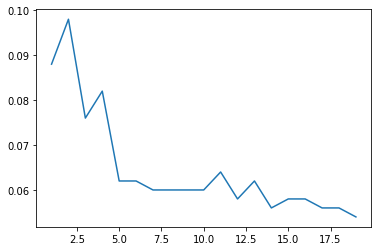

In [54]:
Array1=[]
errorsarray=[]

for i in range(1,20):
    Array1.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    error= 1 - metrics.accuracy_score(Y_test, pred)
    errorsarray.append(error)
print(errorsarray)
plt.plot(Array1,errorsarray)
    